In [14]:
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader
import os
from PIL import Image

In [6]:
chromadb_client = chromadb.PersistentClient("chromadb-vdb")
image_loader = ImageLoader()
embedding_model = OpenCLIPEmbeddingFunction()
collection_vehicules = chromadb_client.get_or_create_collection(
    name="vehicules",
    data_loader= image_loader,
    embedding_function= embedding_model
)

/Users/mohamedyoussfi/Documents/Generative AI/MM_RAG_ENSET/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
images_ids =[]
images_uris=[]
images_folder ="vehicules"
for index, image_name in enumerate(sorted(os.listdir(images_folder))):
    images_ids.append(str(index))
    images_uri = os.path.join(images_folder, image_name)
    images_uris.append(images_uri)



In [9]:
print(images_ids[0:5])
print(images_uris[0:5])

['0', '1', '2', '3', '4']
['vehicules/1.jpg', 'vehicules/10.jpg', 'vehicules/100.jpg', 'vehicules/11.jpg', 'vehicules/12.jpg']


In [10]:
collection_vehicules.add(
    ids= images_ids, uris= images_uris
)

In [11]:
collection_vehicules.count()

107

In [12]:
prompt = "donne moi les voitures rouges les plus anciennes"
results = collection_vehicules.query(
    query_texts=[prompt], n_results=4, include=['uris','distances']
)

In [13]:
results

{'ids': [['23', '106', '7', '27']],
 'embeddings': None,
 'documents': None,
 'uris': [['vehicules/151.jpg',
   'vehicules/99.jpg',
   'vehicules/127.jpg',
   'vehicules/156.jpg']],
 'data': None,
 'metadatas': None,
 'distances': [[1.495100498199463,
   1.5190675486158083,
   1.5225871801376343,
   1.5332423448562622]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.uris: 'uris'>]}

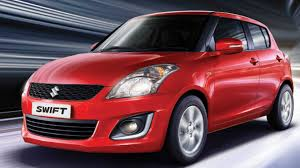

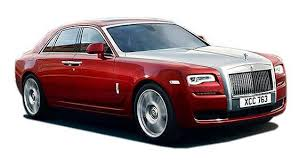

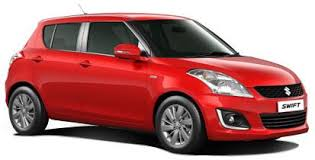

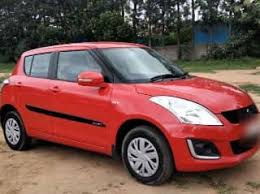

In [16]:
for uri in results['uris'][0]:
    display(Image.open(uri))

In [17]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
import base64 

In [ ]:
OPENAI_API_KEY = "..."
gpt4o = ChatOpenAI(
    model="gpt-4o", temperature=0.0, api_key= OPENAI_API_KEY
)
parser = StrOutputParser()
prompt_template = ChatPromptTemplate.from_messages(
    [
        ('system',"{system_message}"),
        ('user', [
            {"type":"text", "text":"{user_question}"},
            {"type":"images_url", "image_url":"data:image/jpeg;base64,{image_data1}"},
            {"type":"images_url", "image_url":"data:image/jpeg;base64,{image_data2}"},
        ])
    ]
)
vision_chain = prompt_template|gpt4o|parser

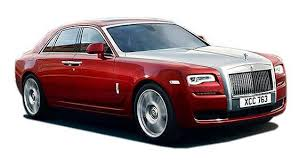

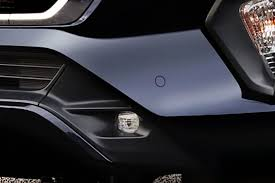

In [37]:
system_message = "répond à la question de l'utilisateur en utilisant les images fournies dans le contexte"
user_question ="donne moi une description des  voitures  les plus anciennes (modèle, marque, poids, taille)"
semantic_results = collection_vehicules.query(
    query_texts=[user_question], n_results=2, include=['uris','distances']
)
image_path1 = semantic_results['uris'][0][0]
image_path2 = semantic_results['uris'][0][1]
display(Image.open(image_path1))
display(Image.open(image_path2))
with open(image_path1, 'rb') as file:
    image_data1 = file.read()
with open(image_path2,'rb') as file:
    image_data2 = file.read()   
images_input = {}
images_input['system_message'] = system_message
images_input['user_question']  = user_question
images_input['image_data1']  = base64.b64encode(image_data1).decode('utf-8')
images_input['image_data2']  = base64.b64encode(image_data2).decode('utf-8')




In [39]:
response = vision_chain.invoke(images_input)

In [40]:
from IPython.display import Markdown
display(Markdown(response))

Je ne peux pas identifier les voitures dans les images fournies. Cependant, je peux te donner des informations sur certaines des voitures noires les plus anciennes et emblématiques :

1. **Ford Model T (1908-1927)**
   - **Marque**: Ford
   - **Poids**: Environ 540 kg
   - **Taille**: Longueur de 3,4 m
   - **Description**: Souvent considérée comme la première voiture produite en masse, elle était disponible en noir à partir de 1914.

2. **Rolls-Royce Silver Ghost (1906-1926)**
   - **Marque**: Rolls-Royce
   - **Poids**: Environ 1 000 kg
   - **Taille**: Longueur de 4,8 m
   - **Description**: Connue pour sa qualité et son luxe, elle était souvent peinte en noir pour les clients les plus prestigieux.

3. **Cadillac V-16 (1930-1940)**
   - **Marque**: Cadillac
   - **Poids**: Environ 2 700 kg
   - **Taille**: Longueur de 5,7 m
   - **Description**: Une voiture de luxe avec un moteur V16, souvent choisie en noir pour son élégance.

Si tu cherches des informations spécifiques sur un modèle, fais-le moi savoir !